In [2]:
import numpy as np
import pandas as pd

numbers = [15,22,7,31,4,17]

for n in numbers:
  if n % 2 == 0:
    print(n, "is even")
  else:
    print(n, "is odd")

new_list = [n for n in numbers if n % 2 == 0]
print(new_list)
new_list_2 = [n**2 for n in numbers if n % 2 != 0]
print(new_list_2)



15 is odd
22 is even
7 is odd
31 is odd
4 is even
17 is odd
[22, 4]
[225, 49, 961, 289]


In [12]:

sentence = "The book was interesting because the book covered many topics and the topics discussed in the book were engaging"
words = sentence.lower().split()

word_count = {}
for word in words:
  if word in word_count:
    word_count[word] += 1
  else:
    word_count[word] = 1

print("Word counts:", word_count)


Word counts: {'the': 4, 'book': 3, 'was': 1, 'interesting': 1, 'because': 1, 'covered': 1, 'many': 1, 'topics': 2, 'and': 1, 'discussed': 1, 'in': 1, 'were': 1, 'engaging': 1}


In [1]:
def is_prime(n):
  if n<2:
    return False
  for i in range(2, int(n**0.5) + 1):
    if n % i == 0:
      return False
  return True



nums = [2, 4, 5, 10, 13, 17, 20, 23]
prime_nums = [n for n in nums if is_prime(n)]
print("Prime numbers:", prime_nums)

Prime numbers: [2, 5, 13, 17, 23]


In [2]:
import numpy as np

np.random.seed(0)
scores = np.random.randint(50, 101, size=(10, 5))
avg_scores = scores.mean(axis=1).reshape(-1, 1)
final_array = np.hstack((scores, avg_scores))

print("Final Scores with Averages:\n", final_array)


Final Scores with Averages:
 [[ 94.   97.   50.   53.   53.   69.4]
 [ 89.   59.   69.   71.  100.   77.6]
 [ 86.   73.   56.   74.   74.   72.6]
 [ 62.   51.   88.   89.   73.   72.6]
 [ 96.   74.   67.   87.   75.   79.8]
 [ 63.   58.   59.   70.   66.   63.2]
 [ 55.   65.   97.   50.   68.   67. ]
 [ 85.   74.   99.   79.   69.   81.2]
 [ 69.   64.   89.   82.   51.   71. ]
 [ 59.   82.   81.   60.   73.   71. ]]


In [3]:
import pandas as pd

columns = ["Subject1", "Subject2", "Subject3", "Subject4", "Subject5", "Average"]
df_scores = pd.DataFrame(final_array, columns=columns)
df_scores.to_csv("scores.csv", index=False)


In [3]:
import pandas as pd
data = {
    "Product": ["Pen", "Notebook", "Pencil", "Eraser", "Marker", "Stapler", "Folder", "Tape"],
    "Price": [7.0, 17.0, 20.0, 53.0, 12.0, 27.0, 11.0, 9.0],
    "Quantity": [12, 6, 26, 17, 8, 3, 14, 6]
}
df = pd.DataFrame(data)
df["TotalValue"] = df["Price"] * df["Quantity"]

df_sorted = df.sort_values(by="TotalValue", ascending=False)
print(df_sorted)

grouped_avg = df.groupby("Price")["Quantity"].mean()
print(grouped_avg)


    Product  Price  Quantity  TotalValue
3    Eraser   53.0        17       901.0
2    Pencil   20.0        26       520.0
6    Folder   11.0        14       154.0
1  Notebook   17.0         6       102.0
4    Marker   12.0         8        96.0
0       Pen    7.0        12        84.0
5   Stapler   27.0         3        81.0
7      Tape    9.0         6        54.0
Price
7.0     12.0
9.0      6.0
11.0    14.0
12.0     8.0
17.0     6.0
20.0    26.0
27.0     3.0
53.0    17.0
Name: Quantity, dtype: float64


In [7]:
titanic = pd.read_csv("train.csv")

print("Missing values:\n", titanic.isnull().sum())

under_18 = titanic[titanic["Age"] < 18]
print("Passengers under 18:\n", under_18)

female_survivors = titanic[(titanic["Sex"] == "female") & (titanic["Survived"] == 1)]
print("Female survivors:\n", female_survivors)

avg_fare_by_class = titanic.groupby("Pclass")["Fare"].mean()
print("Average fare by class:\n", avg_fare_by_class)


Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Passengers under 18:
      PassengerId  Survived  Pclass                                     Name  \
7              8         0       3           Palsson, Master. Gosta Leonard   
9             10         1       2      Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1       3          Sandstrom, Miss. Marguerite Rut   
14            15         0       3     Vestrom, Miss. Hulda Amanda Adolfina   
16            17         0       3                     Rice, Master. Eugene   
..           ...       ...     ...                                      ...   
850          851         0       3  Andersson, Master. Sigvard Harald Elias   
852          853         0       3                  Boulos, Miss. Nourelain   
853      

In [9]:
heart = pd.read_csv("processed.cleveland.data", header=None, na_values='?')
heart.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
                 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
                 'NumVesselsFluoro', 'Thalassemia', 'HeartDisease']

# Convert to numeric
cols_to_numeric = ['NumVesselsFluoro', 'Thalassemia']
heart[cols_to_numeric] = heart[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

print("Missing values:\n", heart.isnull().sum())

# Impute missing values
for col in ['NumVesselsFluoro', 'Thalassemia']:
    if heart[col].dtype == 'float64':
        heart[col].fillna(heart[col].median(), inplace=True)
    else:
        heart[col].fillna(heart[col].mode()[0], inplace=True)

# Drop rows with >2 missing
heart = heart[heart.isnull().sum(axis=1) <= 2]

# Group by HeartDisease
chol_avg = heart.groupby("HeartDisease")["Cholesterol"].mean()
print("Average Cholesterol by Heart Disease:\n", chol_avg)


Missing values:
 Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol         0
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
NumVesselsFluoro    4
Thalassemia         2
HeartDisease        0
dtype: int64
Average Cholesterol by Heart Disease:
 HeartDisease
0    242.640244
1    249.109091
2    259.277778
3    246.457143
4    253.384615
Name: Cholesterol, dtype: float64


<ipython-input-9-a26ae98f4b3d>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  heart[col].fillna(heart[col].median(), inplace=True)


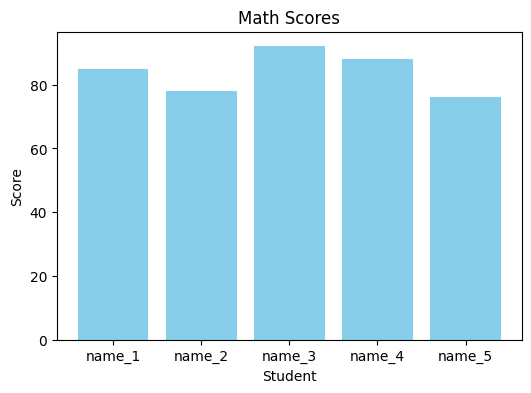

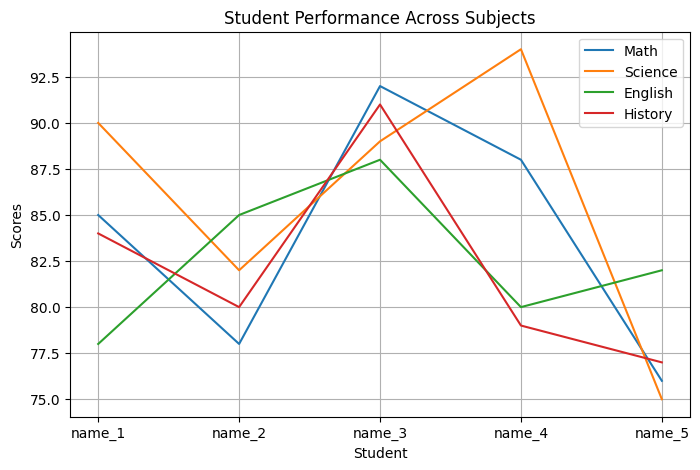

In [4]:
import matplotlib.pyplot as plt

data = {
    "Name": ["name_1", "name_2", "name_3", "name_4", "name_5"],
    "Math": [85, 78, 92, 88, 76],
    "Science": [90, 82, 89, 94, 75],
    "English": [78, 85, 88, 80, 82],
    "History": [84, 80, 91, 79, 77]
}
df_scores = pd.DataFrame(data)

plt.figure(figsize=(6, 4))
plt.bar(df_scores["Name"], df_scores["Math"], color='skyblue')
plt.title("Math Scores")
plt.xlabel("Student")
plt.ylabel("Score")
plt.show()

plt.figure(figsize=(8, 5))
for subject in ["Math", "Science", "English", "History"]:
    plt.plot(df_scores["Name"], df_scores[subject], label=subject)

plt.title("Student Performance Across Subjects")
plt.xlabel("Student")
plt.ylabel("Scores")
plt.legend()
plt.grid(True)
plt.show()


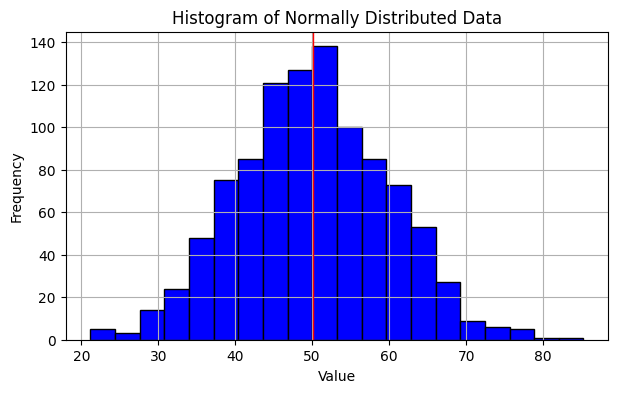

In [12]:
data = np.random.normal(loc=50, scale=10, size=1000)

plt.figure(figsize=(7, 4))
plt.hist(data, bins=20, color='blue', edgecolor='black')
plt.axvline(data.mean(), color='red', linewidth=1)
plt.title("Histogram of Normally Distributed Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
